<h1> Exercicio 4 - Classificação </h1>

1- Utilize o dataset “titanic.csv”, disponível no moodle. Considere 70% das instâncias para treino e
30% para validação. Construa um modelo utilizando Árvore de Decisão para prever se uma pessoa
sobreviveu ou não.

a) Mostre a árvore encontrada.

[Text(0.30671479430379744, 0.9705882352941176, 'Sex <= 0.5\ngini = 0.475\nsamples = 620\nvalue = [379, 241]\nclass = y[0]'),
 Text(0.1337025316455696, 0.9117647058823529, 'Pclass <= 2.5\ngini = 0.371\nsamples = 232\nvalue = [57, 175]\nclass = y[1]'),
 Text(0.03375527426160337, 0.8529411764705882, 'Age <= 2.5\ngini = 0.06\nsamples = 129\nvalue = [4, 125]\nclass = y[1]'),
 Text(0.016877637130801686, 0.7941176470588235, 'Pclass <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = y[0]'),
 Text(0.008438818565400843, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = y[0]'),
 Text(0.02531645569620253, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y[1]'),
 Text(0.05063291139240506, 0.7941176470588235, 'Fare <= 29.356\ngini = 0.046\nsamples = 127\nvalue = [3, 124]\nclass = y[1]'),
 Text(0.04219409282700422, 0.7352941176470589, 'Fare <= 28.231\ngini = 0.111\nsamples = 51\nvalue = [3, 48]\nclass = y[1]'),
 Text(0.03375527426160337, 0.67647058823529

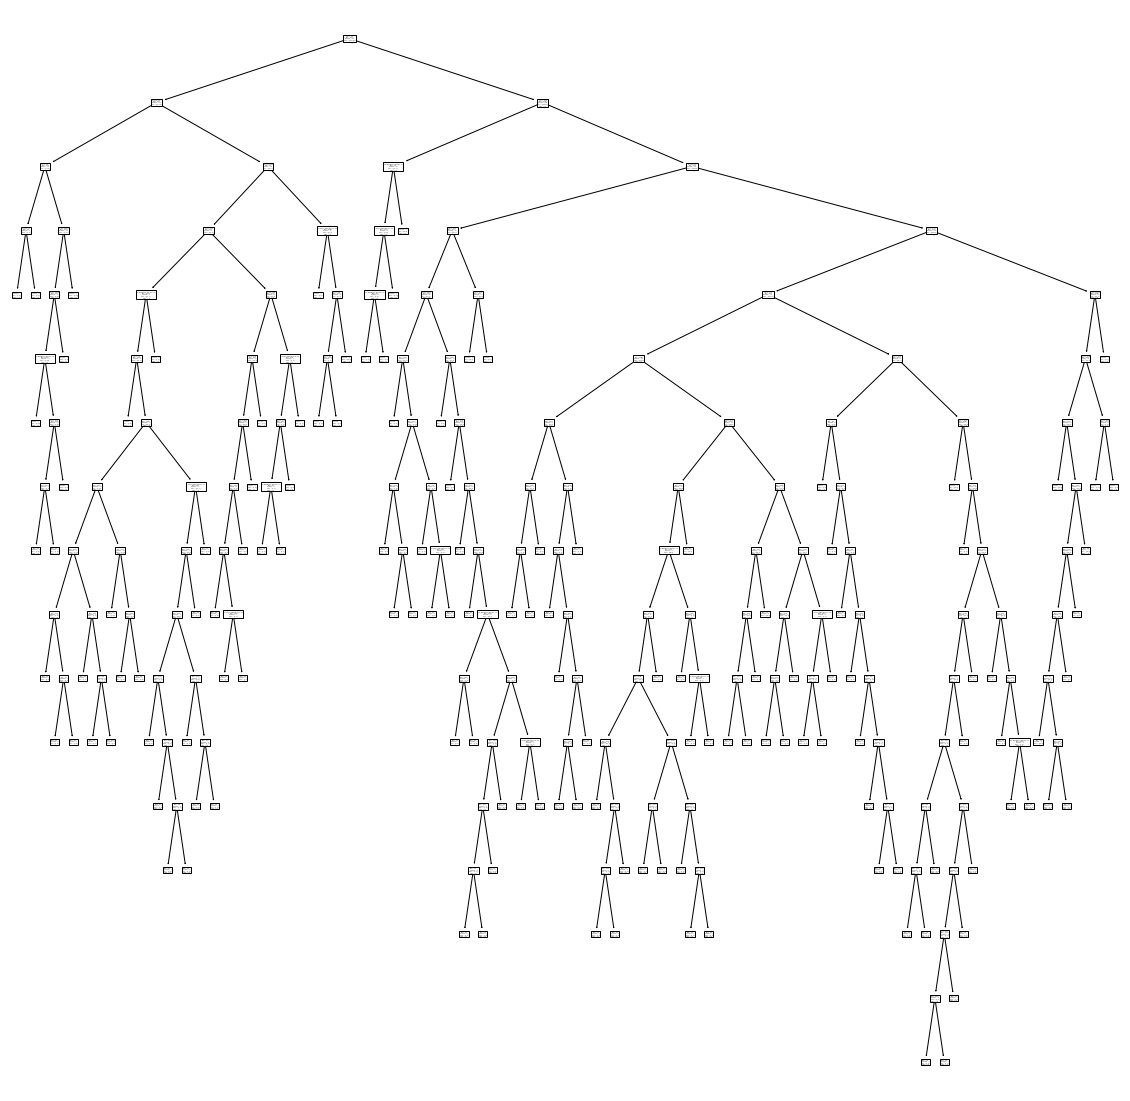

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

## Abre o arquivo
df = pd.read_csv("titanic.csv")

#Transforma a coluna 'Sex' em categoria
df['Sex'] = pd.Categorical(df['Sex'])
#Gera um código numérico para cada categoria
df['Sex'] = df['Sex'].cat.codes
 
## Cria um dataframe apenas com os colunas que serão utilizadas
df_use = df[['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']]

## Separa o dataframe em dados de treino e teste. 30% teste e 70% treino
df_train, df_test = train_test_split(df_use, test_size=0.3, random_state=42)

## Separa em X e y nos dados de treino
X = df_train[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']]
y = df_train['Survived']

## Cria instância da árvore de decisão
clf = tree.DecisionTreeClassifier()

## Faz o treinamento com os dados de interesse
clf.fit(X, y)

## Visualiza a árvore encontrada
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(clf, feature_names = X.columns, class_names=True) 

b) Qual a acurácia do modelo obtida com os dados de validação?

In [2]:
## Separa em X e y dos dados de teste
X_test = df_test[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']]
y_test = df_test['Survived']

## Calcula o score do modelo 
clf.score(X_test, y_test)

0.7752808988764045

2- Considere ainda uma árvore de decisão para classificar se um indivíduo sobreviveu ou não com
base no dataset “titanic.csv”. Qual o resultado médio de acurácia utilizando a estratégia de
validação cruzada 10-fold? Discuta os resultados.

In [3]:
from sklearn.model_selection import cross_val_score

## Cria dois dataframes com os dados X e Y
X = df[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']]
y = df[['Survived']]

## Cria o modelo 
tree_model = tree.DecisionTreeClassifier()
## Faz a previsão usando a validação cruzada
scores = cross_val_score(tree_model, X, y, cv=10)

#Visão do desempenho baseada em 10 divisões.
print(scores.mean())

#Desvio padrão da média. 
print(scores.std())

0.7937819203268641
0.04111768109844147


Observa-se que o o resultao foi um pouco melhor do que a árvore gerada anteriormente, aumentando em cerca e 2%. Também se observa que o desvio padrão é de 4,1%.

3- Ainda considerando o dataset “titanic.csv”, construa um modelo utilizando k-NN para prever se
uma pessoa sobreviveu ou não. Considere diferentes valores de k vizinhos: k={2,3,4,5,6,7}. Houve
variação significativa nos diferentes modelos testados? Algum deles foi melhor do que a estratégia
baseada em árvore de decisão?

In [4]:
from sklearn.neighbors import KNeighborsClassifier

## Separa o dataframe em X e Y
X = df[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']]
y = df[['Survived']]

## Cria uma lista com todos os valores que vão ser considerados para os K vizinhos
neighs = [2,3,4,5,6,7]

## Lista para conter os dados
results = []

## Percorre a lista com os dados que vão ter os K
for i in neighs:
    ## Cria o KNN com os i vizinhos
    neigh = KNeighborsClassifier(n_neighbors=i)
    ## Faz a validação cruzada, com k = 5
    scores = cross_val_score(neigh, X, y, cv=5)
    ## Calcula a média e coloca na lista o K e a média
    results.append([i, scores.mean()])
## Mostra os resultados
for i in results:
    print(f"K: {i[0]}, Acurácia: {i[1]}")

K: 2, Acurácia: 0.6810004443598044
K: 3, Acurácia: 0.7047165619247128
K: 4, Acurácia: 0.6934107788992573
K: 5, Acurácia: 0.6945915063797372
K: 6, Acurácia: 0.6923252713768806
K: 7, Acurácia: 0.6889608328572334


Não, não houve uma mudança significativa, sendo a maior diferença entre os resultados foi de cerca de 2%. <br>
Não, nenhum dos valores foi superior ao da árvore de decisão, que tinha o valor de 0,775.